
___Data Mining in Python___

<hr>

#### Introduction

We as humans are experts learning patterns from our own experience and datasets. Data mining is to ask machines to do this task for us -- the process of extracting patterns from datasets that we can generalize to unseen ones.

After that, we can see if we really have it:

In [1]:
import sklearn
sklearn.__version__

'0.24.2'

---

#### Data representation

For simplicity, we are only dealing with tabular data. Other forms of unstructured data such as text, image, and video, are in fact, if not more, equivalently important in data mining. Nonetheless, they beyond the scope of this workshop.

By tabular data, I mean _a spreadsheet-like dataset_ that has rows and columns, where:
- rows: observations
- columns: features/variables

As an example, let's use a toy dataset in [`sklearn.datasets` module](http://scikit-learn.org/stable/datasets/index.html#datasets): `boston housing prices`

Recall that we can use `import XXX as Y` to simply the library names.

In [2]:
import sklearn.datasets as skdata

In [3]:
boston_dat = skdata.load_boston()
type(boston_dat)

sklearn.utils.Bunch

The returned type, by default, is `sklearn.utils.Bunch`, something similar to a dictionary.

In [27]:
boston_dat.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [28]:
boston_dat['filename']

'/usr/local/lib/python3.9/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [29]:
print(boston_dat['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The real data is in the key of `data`:

In [30]:
dat = boston_dat['data']
dat

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Therefore, it is in fact stored as a `numpy.ndarray`! If you forgot, feel free to check out our [preivous notebook](https://github.com/zhiyzuo/python-tutorial/blob/master/2-Functions-External_Libraries-File_IO.ipynb) on this topic.

In [31]:
dat.shape

(506, 13)

As described above, each row in this case is probably a town-level set of features, containing crime rates and so on.k

The corresponding target is stored as:

In [9]:
tar = boston_dat['target']
tar.size

506

Note that in using scikit-learn, we usually need seperate X/y, which are features/targets respectively. We can obtain this by doing:

In [10]:
boston_X, boston_y = skdata.load_boston(return_X_y=True) # by default `return_X_y` is False
boston_X.shape

(506, 13)

In [11]:
boston_y.size

506

We can make sure that these two methods generate the same datasets:

In [12]:
import numpy as np

`np.all` checks if _ALL_ elements in the input array are `True` (not `False`)

In [13]:
np.all(tar==boston_y)

True

In [14]:
np.all(dat==boston_X)

True

---

In [15]:
import warnings
warnings.filterwarnings("ignore")

#### A starter: Linear regression with artifical data

##### Create the fake data

Let's start with Mr. Linear Regression. As for the dataset, we will go with a manually created data so that we know the ground truth.

In [16]:
X = np.arange(10).reshape(10,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

The target will be the linear transformation of `X` with some Gaussian noise

In [32]:
y = 5*np.arange(10) + 3 + np.random.normal(loc=0, scale=1, size=X.shape[0])
y

array([ 4.50058046,  8.72697531, 12.46448287, 16.19513846, 22.80502314,
       26.55722581, 34.07640128, 36.79640013, 42.18029134, 46.64192763])

Visualization is always the best tool for preliminary analysis so that we know what's going on, especially when the dataset is simple. For a more complete intro to visualization in Python, please refer to [this notebook](https://github.com/zhiyzuo/python-tutorial/blob/master/4-Visualization-with-Matplotlib.ipynb)

In [18]:
from matplotlib import pyplot as plt
# this means we will show the figures inline in the notebook
%matplotlib inline 

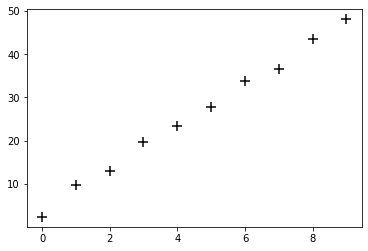

In [19]:
plt.scatter(X, y, marker='+', c='k', s=100)

See? It's a very obvious straight line trend.

Now let's use scikit-learn to help us find the coefficients of this line. All the _linear models_ are in [`sklearn.linear_model` module](http://scikit-learn.org/stable/modules/linear_model.html#linear-model)

##### Example: Running linear regression 

In scikit-learn, the process of using a model goes like this:
- Import the model
- Instantiate an object, with the desired parameters of the model 
    - Note that it is not always necessary. We can use cross validation and grid search to find out the relatively optimal sets of hyperparameters of our model (see the following sections for more details)
- Apply `fit()` function of the model to _train_ it given the data
- Apply `predict()` function to predict either seen or unseen data points depending on what we want

In [20]:
from sklearn.linear_model import LinearRegression

First, we need to instantiate an object of `LinearRegression` class.

In [21]:
lr = LinearRegression()
lr

LinearRegression()

`lr` here will help us conduct the optimization of _least square errors_ based on the given data

`fit()` usually takes the features and targets so that the parameters of the model can be adjusted to best fit our model for future use. In this case, we want to know the regression coefficients (and maybe the intercept.)

In [22]:
lr.fit(X, y)

LinearRegression()

Now we have a fitted model. We can check out the coefficients now:

In [23]:
lr.coef_

array([4.92854529])

In [24]:
lr.intercept_

3.6195292024967323

##### Evaluate the fit

To see how it works out more vividly, let's plot the true targets and predicted targets using `lr`:

In [25]:
y_pred = lr.predict(X)
y_pred

array([ 3.6195292 ,  8.54807449, 13.47661978, 18.40516507, 23.33371036,
       28.26225565, 33.19080094, 38.11934623, 43.04789152, 47.97643681])

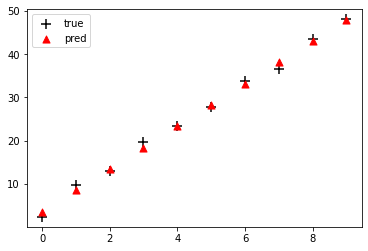

In [26]:
plt.scatter(X, y, label='true', marker='+', c='k', s=100)
plt.scatter(X, y_pred, label='pred', marker='^', c='r', s=50)
plt.legend()

Pretty good, right? Now that we have a taste of how to use the models in scikit-learn, let's move on to more realistic examples.

---

#### Splitting data and model selection

##### Explaining by word

In the example above, we used ___all the data___ to train our model. From the perspective of explanatory analysis, this is probably fine. However, in many cases, we want to use our fitted model to predict _unseen_ data.

In this case, training the model with all the data is not going to help: we need to somehow figure out one way to approximate the real predictive power.

One common way is to split our dataset into _train_ and _test_ sets, where:
- train data is used for tuning the model
- test data is used for evaluation

We can further split _train_ into:
- train data for fitting the model with a set of parameters
- validation data for evaluating this set of parameters.

Again, visualization is the way to help:
![Imgur](https://i.imgur.com/dRQGfp0.png?1)

In this illustration, we split the dataset into _five_ folds, where:
- The 1st fold will be held out for evaluation of the _best model we found based on folds two to five_
    - Note that usually the model will be _refitted_ using all training fold (2 to 5 in this case)
- In one iteration of evaluating one set of parameters $\lambda$:
    - The 2nd fold is a "inner" held out $\lambda$
    - The 3rd, 4th, and 5th are for model fitting

Then, we can iterate test fold from 1 to 2, 3, 4, and 5 and compute the average performance across five folds.

##### Example by `KFold`

In scikit-learn, many useful functions/classes for the purpose of model selection are from [`sklearn.model_selection`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In this example, we choose to use [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to evenly split our dataset into $K$ fold. Given the small size of our toy dataset, we will go with $K=3$:

In [33]:
from sklearn.model_selection import KFold

In [34]:
kf = KFold(n_splits=3)

`kf` here works as a data splitter where the ___indices___ of the rows (i.e., observations) are exported:

In [35]:
for train_idx, test_idx in kf.split(X):
    print('Train indices:', end=' ')
    print(train_idx)
    print('Test indices:', end=' ')
    print(test_idx)
    print('-------------')

Train indices: [4 5 6 7 8 9]
Test indices: [0 1 2 3]
-------------
Train indices: [0 1 2 3 7 8 9]
Test indices: [4 5 6]
-------------
Train indices: [0 1 2 3 4 5 6]
Test indices: [7 8 9]
-------------


Note that within each train, we can further split into smaller folds for train/validation

In [37]:
inner_kf = KFold(2)

In [38]:
for train_idx, test_idx in kf.split(X):
    print('Train indices:', end=' ')
    print(train_idx)
    for tr_idx, va_idx in inner_kf.split(X[train_idx, :]):
        print('************')
        print('Inner train:', end=' ')
        print(tr_idx+train_idx[0])
        print('Inner validation:', end=' ')
        print(va_idx+train_idx[0])
    print('************')
    print('Test indices:', end=' ')
    print(test_idx)
    print('-------------')

Train indices: [4 5 6 7 8 9]
************
Inner train: [7 8 9]
Inner validation: [4 5 6]
************
Inner train: [4 5 6]
Inner validation: [7 8 9]
************
Test indices: [0 1 2 3]
-------------
Train indices: [0 1 2 3 7 8 9]
************
Inner train: [4 5 6]
Inner validation: [0 1 2 3]
************
Inner train: [0 1 2 3]
Inner validation: [4 5 6]
************
Test indices: [4 5 6]
-------------
Train indices: [0 1 2 3 4 5 6]
************
Inner train: [4 5 6]
Inner validation: [0 1 2 3]
************
Inner train: [0 1 2 3]
Inner validation: [4 5 6]
************
Test indices: [7 8 9]
-------------


##### Logistic regression with Lasso

Regression with Lasso regularization is a popular model for variable selection thanks to the l1 norm penalty on the coefficients. More details in [link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

The important parameter for Lasso is $\alpha$ - how much do we want to penalize the absolute values of the weights. Quote from the offical documentation:
> Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

In [45]:
from sklearn.linear_model import LogisticRegression

For simplicity, we try 3 values:

In [46]:
alpha_list = [0.001, 0.003, 0.005]

We need a dataset with more variables. Let's use the breast cancer data:

In [47]:
bc_X, bc_y = skdata.load_breast_cancer(True)
bc_X.shape

(569, 30)

In [48]:
bc_y.size

569

There are two labels/targets: 0 (malignant), 1 (benign)

In [49]:
np.unique(bc_y), np.bincount(bc_y)

(array([0, 1]), array([212, 357]))

Using the code block above, we can further plug in model fitting and evaluating code using the inner train/validation datasets.

 At this moment, we will use _accuracy_ as an evaluation metric. That is, we want to know how many of the predicted labels match the true values.

In [50]:
kf = KFold(3)
inner_kf = KFold(2)

Pseudo code for the following cell:
- for each split `train_idx, test_idx` do:
    - initialize `mean_acc` as a dictionary to save alpha as key and their average accuracy across folds as values
    - for each alpha value `a` in `alpha_list`:
        - for each split given `train_idx`, do:
            - extract subsets of `bc_X` and `bc_y`
            - fit a Lasso logistic regression using `a`
            - evaluate the fitted model on validation set defined by `va_idx`
    - select `best_a` based on the average performance
    - fit a new logistic regression model using `best_a` on all the training data (`train_idx`)
    - evaluate on the test set (`test_idx`)

In [53]:
for i, (train_idx, test_idx) in enumerate(kf.split(bc_X)):
    print('Fold %d as test...'%i)
    ## conduct model selection for each train/test split
    mean_acc = {a:0 for a in alpha_list}
    for a in alpha_list:
        #print('Train/validating alpha value', a, '...')
        for tr_idx, va_idx in inner_kf.split(bc_X[train_idx, :]):
            ## train
            tr_idx = tr_idx+train_idx[0]
            bc_X_tr, bc_y_tr = bc_X[tr_idx, :], bc_y[tr_idx]
            ## l1 norm -> lasso, C is the inverse of penalty constant,
            ## max_iter set to higher values for convergence
            lasso = LogisticRegression(C=1/a, penalty='l1', solver='liblinear',max_iter=1000)
            lasso.fit(bc_X_tr, bc_y_tr)
            ## validate: use score function to obtain the accuracy
            va_idx = va_idx+train_idx[0]
            ## record the accuracy
            mean_acc[a] += lasso.score(bc_X[va_idx, :], bc_y[va_idx])
        mean_acc[a] = mean_acc[a]/inner_kf.n_splits
    print('Accuracy for each alpha value:', mean_acc)
    ## now that we have the dictionary, we should pick the alpha that gives the highest accuracy
    best_a = sorted(mean_acc, key=lambda k: mean_acc[k], reverse=True)[0]
    print('Best alpha picked: %.3f'%best_a)
    ## fit a new model
    lasso = LogisticRegression(C=1/best_a, penalty='l1', solver='liblinear', max_iter=1000)
    lasso.fit(bc_X[train_idx], bc_y[train_idx])
    print('Accuracy on test set: ', lasso.score(bc_X[test_idx], bc_y[test_idx]))
    print('-------------')

Fold 0 as test...
Accuracy for each alpha value: {0.001: 0.9551378446115288, 0.003: 0.9604149262043999, 0.005: 0.9551378446115288}
Best alpha picked: 0.003
Accuracy on test set:  0.9473684210526315
-------------
Fold 1 as test...
Accuracy for each alpha value: {0.001: 0.9499025341130605, 0.003: 0.9551656920077972, 0.005: 0.9578111946532999}
Best alpha picked: 0.005
Accuracy on test set:  0.968421052631579
-------------
Fold 2 as test...
Accuracy for each alpha value: {0.001: 0.9473684210526316, 0.003: 0.9552631578947368, 0.005: 0.9578947368421052}
Best alpha picked: 0.005
Accuracy on test set:  0.9523809523809523
-------------


##### Using [`GridCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In fact, we do not need to use for loop for cross validation manually. Instead, a very convenient class called [`GridCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) can be applied for this purpose.

To put it simple, `GridCV` needs to know what model you want to use and what parameters you want to search for. There are more options you can play with, including the number of parallel jobs to run, evaluation scores (besides accuracy, we can use others such as recall/precision/auc/F1), and so on.

Using the breast cancer data and logistic regression with the same set of `alpha_list`:

In [68]:
alpha_list

[0.001, 0.003, 0.005]

Inverse the alpha values for the `C` parameter in logistic regression model:

In [69]:
C_list = [1/a for a in alpha_list] # list comprehension
C_list

[1000.0, 333.3333333333333, 200.0]

In [70]:
lasso = LogisticRegression(max_iter=1000, penalty='l1')

In [71]:
from sklearn.model_selection import GridSearchCV

- The `param_grid` argument takes in a dictionary, where each key is a parameter for the given model and the corresponding value is a list of choices for that parameter.
- We can then obtain the best estimator (i.e., model) based on the score on the given train (and validation) dataset and use it to predict the unseen (i.e. test held out) data. By default, the model with the selected parameters will be fitted by the whole training data (train plus validation) once `fit` function is done.

In [74]:
for i, (train_idx, test_idx) in enumerate(kf.split(bc_X)):
    print('Fold %d as test...'%i)
    ## do a 2-fold cross validation for train/validation
    param_grid = [
      {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'C': C_list},
      #{'penalty': ['l2'], 'solver': ['newton-cg']},
    ]
    # grid = GridSearchCV(lasso, param_grid, cv=5, iid=False)
    grid = GridSearchCV(lasso, param_grid, cv=5)
    grid.fit(bc_X[train_idx], bc_y[train_idx])
    ## predict
    print('Best parameters picked: %s'%grid.best_params_)
    print('Accuracy on test set: ', grid.best_estimator_.score(bc_X[test_idx], bc_y[test_idx]))
    print('---')

Fold 0 as test...
Best parameters picked: {'C': 200.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on test set:  0.9526315789473684
---
Fold 1 as test...
Best parameters picked: {'C': 333.3333333333333, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on test set:  0.9736842105263158
---
Fold 2 as test...
Best parameters picked: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on test set:  0.9312169312169312
---


---

#### Supervised linearning

There are mainly two types of ___supervised___ task: 
- _classification_: the target variable is nominal (for example, the prediction of whether or not the stock price will go up or not)
- _regression_: the target variable is continuous (for example, the prediction of students' test scores)

By ___supervised___, we mean there are labels for them. On the contrary, a task is ___unsupervised___ if there are no predefined labels and different solutions may exist based on different assumptions or goals.

In this the following examples, we will skip the step of cross validation and just do one train/test split to keep the brevity of this tutorial but it is a good exercise to modify the code and include model selection (that is, parameter tuning.)

We arbitrarily split all the following datasets into 3 folds, 2 of which are used as training and 1 as testing.

##### Classification: hand written digit recognition

As a motivating example, we will try to classify what a digit (from 0 to 9) is given the pixel values.

In [75]:
digits = skdata.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

There are images available to visualize the digits!

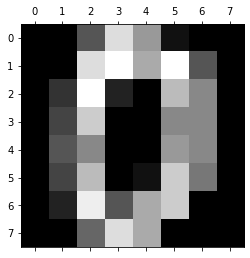

In [76]:
plt.matshow(digits.images[0], cmap=plt.cm.gray) 

In [77]:
digits_X = digits['data']
digits_y = digits['target']

In [78]:
train_indices = np.random.choice(np.arange(digits_y.size), replace=False,
                                 size=int(2/3*digits_y.size))
train_indices.size

1198

In [79]:
test_indices = np.array([idx for idx in range(digits_y.size) if idx not in train_indices])
test_indices.size

599

In [80]:
digits_X_train, digits_y_train = digits_X[train_indices, :].copy(), digits_y[train_indices].copy()
digits_X_test, digits_y_test = digits_X[test_indices, :].copy(), digits_y[test_indices].copy()

Just for the purpose of using as many classifiers as we can to get to know more, we would try [random forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
forest = RandomForestClassifier(n_estimators=20)
forest.fit(digits_X_train, digits_y_train)

RandomForestClassifier(n_estimators=20)

Training accuracy:

In [83]:
forest.score(digits_X_train, digits_y_train)

0.9991652754590985

Testing accuracy:

In [84]:
forest.score(digits_X_test, digits_y_test)

0.9515859766277128

This means that _over 95% of the test instances are correctly predicted_.

##### Regression

There is really not much differences when using regression models. As an example, let's use the previously loaded boston housing dataset.

In [ ]:
boston_X.shape, boston_y.shape

((506, 13), (506,))

In [ ]:
train_indices = np.random.choice(np.arange(boston_y.size), replace=False,
                                 size=int(2/3*boston_y.size))
test_indices = np.array([idx for idx in range(boston_y.size) if idx not in train_indices])
train_indices.size, test_indices.size

(337, 169)

In [ ]:
boston_X_train, boston_y_train = boston_X[train_indices, :].copy(), boston_y[train_indices].copy()
boston_X_test, boston_y_test = boston_X[test_indices, :].copy(), boston_y[test_indices].copy()

This time, let's play with neural networks

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(max_iter=1000)
mlp.fit(boston_X_train, boston_y_train)
mlp.score(boston_X_train, boston_y_train)

0.850636674887043

Instead of $R^2$, other measures such as RMSE or MAE may be better choices since we are more interested in how close we can predict

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Train score:

In [ ]:
boston_y_train_pred = mlp.predict(boston_X_train)
mean_squared_error(boston_y_train, boston_y_train_pred), mean_absolute_error(boston_y_train, boston_y_train_pred)

(14.291661335303866, 2.7007386278729246)

Test score:

In [ ]:
boston_y_test_pred = mlp.predict(boston_X_test)
mean_squared_error(boston_y_test, boston_y_test_pred), mean_absolute_error(boston_y_test, boston_y_test_pred)

(16.374726600865877, 3.032299102188372)

Not bad! We can plot the real y vs. predicted y values to visually show the performance:

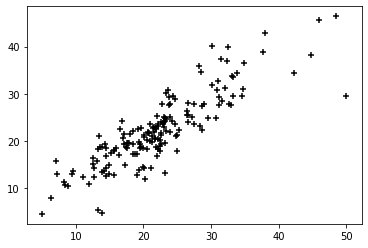

In [ ]:
plt.scatter(boston_y_test, boston_y_test_pred,
            c='k', marker='+')

##### Metric APIs

While accuracy is probably the most straightforward and intuitive measure to evaluate the goodness of predictive models, it is not always ideal. For example, think about a dataset where only 1% are with label 1 while the rest 99% are label 0. Under such settings, we can obtain an accuracy of 99% by predicting everything as label 0.

For regression, mean square errors would put more weights on large errors.

Therefore, every metric used for evalution of predictive power is somehow biased. We need to pick one that best fits our needs. 

Fortunately, scikit-learn provides very convenient APIs for different kinds of metrics: [link](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

---

#### Unsupervised learning: Clustering as an example

Unsupervised methods can be applied to datasets where no labels are available, on the contrary to supervised settings. Theoretically, we can apply unsupervised learning for predictions even when labels are available but performances are usually not comparable to supervised methods.

A good example is clustering, which is commonly used in image segmentation, marketing analytics, and crime analytics. Here we apply the classic k-means clustering. The algorithm iteratively updates cluster centroids, which are the centers and representitative of the group.

##### Two-dimensional example

To make this easier to visualize, let's make some fake data that are only two-dimenional in the space:

In [85]:
c1_center = [10, 10]
c2_center = [0, 0]
cov = np.eye(2) # unit covariance
cov

array([[1., 0.],
       [0., 1.]])

In [86]:
c1_data = np.random.multivariate_normal(mean=c1_center, cov=cov, size=100)
c2_data = np.random.multivariate_normal(mean=c2_center, cov=cov, size=100)
c1_data.shape, c2_data.shape

((100, 2), (100, 2))

Combined the two clusters and shuffle the row orders

In [87]:
cluster_data = np.vstack([c1_data, c2_data])
np.random.shuffle(cluster_data)
cluster_data.shape

(200, 2)

Let's try cluster! Just to remind you that this is a very very simple data, whose patterns are known in advance. Therefore, we will ask the algorithm to find _two_ clusters.

In [88]:
from sklearn.cluster import KMeans

In [89]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster_data)

KMeans(n_clusters=2)

Checkout the centroids: looks perfect!

In [90]:
kmeans.cluster_centers_

array([[-0.22325865,  0.06803496],
       [10.00339077, 10.07114135]])

Finally, let's visualize the clustering! To do this, we use different shapes and colors for different clusters defined by the `kmeans` model:

In [91]:
c0_fit = cluster_data[kmeans.labels_==0]
c1_fit = cluster_data[kmeans.labels_==1]
c0_fit.shape, c1_fit.shape

((100, 2), (100, 2))

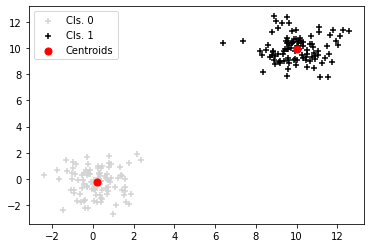

In [ ]:
plt.scatter(c0_fit[:,0], c0_fit[:,1], c='lightgray', marker='+', label='Cls. 0')
plt.scatter(c1_fit[:,0], c1_fit[:,1], c='k', marker='+', label='Cls. 1')
## also plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='r', label='Centroids', s=50)
plt.legend()

##### Finding "optimal" clusters

Of course, we always have more complex patterns in the reality, where we may need to find out a cluster number that best fits the data. To see how this works, we can use the hand-written digits data. Again, we do know that the optimal one is probably 10 (recall that there are 0 ~ 9 digits) so that we can see if our method to search for the "optimal" cluster number makes sense or not.

A common way is called elbow method. Specifically, we measure the model fit across different cluster numbers and pick the one which is the _elbow_, the tipping point where the clustering quality goes up steeply. Let's use an example to see how this works. In the following, we use [Silhouette Coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to measure clustering quality but there are many others.

In [93]:
from sklearn.metrics import silhouette_score

In [94]:
silhouette_score_list = []
max_k = 15
for n_cls in range(2, max_k):
    kmeans = KMeans(n_clusters=n_cls)
    kmeans.fit(digits_X)
    silhouette_score_list.append(silhouette_score(digits_X, kmeans.labels_))
silhouette_score_list = np.array(silhouette_score_list)
silhouette_score_list

array([0.11832841, 0.12649602, 0.12806713, 0.13602996, 0.15159864,
       0.15938225, 0.17883754, 0.18917734, 0.18224955, 0.18309475,
       0.18321775, 0.18576432, 0.18773778])

Again, visualization is always our friend to present such trends:

Text(0.5, 0, '# of Clusters')

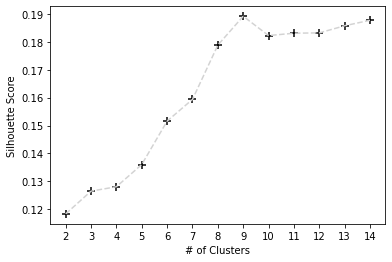

In [95]:
plt.scatter(np.arange(2, max_k), silhouette_score_list, c='k', marker='+', s=50)
plt.plot(np.arange(2, max_k), silhouette_score_list, linestyle='--', c='lightgray')
plt.xticks(np.arange(2, max_k))
plt.ylabel('Silhouette Score')
plt.xlabel('# of Clusters')

According to the results, 9 or 10 may be what we really want for this digits data.

---

#### Conclusion

In this tutorial, we went through data representation, cross validation and hyperparameter tuning, and some examples of classification, regression and clustering. 

## Practice

Let's play around with titanic dataset, and car dataset.

There are other great tutorials on scikit-learn:

- http://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://www.datacamp.com/community/tutorials/machine-learning-python
- https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/